In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from quimb import *
import time
from os import path


In [25]:
Nrep=1
r=2 # local Hilbert space dim

Lc = 8
Nc=r**Lc
Lb = 2
Lalist=np.arange(1,Lb+Lc+4)
# Lclist=np.arange(int(Lab/2)-2,int(Lab/2)+2)

# neg_q=np.zeros((int(Lab/2)+1,len(Lclist),Nrep))
neg_q = np.zeros(Nrep)
MI = np.zeros(Nrep)


for i_c in range(len(Lalist)):
    La=Lalist[i_c]
    Lab= La+Lb
    dims_ab = [r] * Lab
    print('Na = %d' % (La))

    L= Lab+Lc
    dims = [r] * L
    N = prod(dims)

    t_timer=time.time()
    for i_r in range(Nrep):
        psi = rand_ket(N)
        
        neg_q[i_r] = negativity_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        MI[i_r] = mutinf_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        
    elapsed = time.time() - t_timer
    print("Finished, quimb elapsed time = %.2f " % (elapsed)+ "sec")

    f1= 'LN_r_%d_NA_%d_NB_%d_NC_%d.npz' % (r,La,Lb,Lc)
    out_dir = 'LN_figs/' 
    fname = out_dir+f1
    np.savez(fname, logneg=neg_q, MI=MI)
# print(neg_q)

Na = 1
Finished, quimb elapsed time = 0.02 sec
Na = 2
Finished, quimb elapsed time = 0.01 sec
Na = 3
Finished, quimb elapsed time = 0.03 sec
Na = 4
Finished, quimb elapsed time = 0.01 sec
Na = 5
Finished, quimb elapsed time = 0.04 sec
Na = 6
Finished, quimb elapsed time = 0.30 sec
Na = 7
Finished, quimb elapsed time = 0.20 sec
Na = 8
Finished, quimb elapsed time = 0.26 sec
Na = 9
Finished, quimb elapsed time = 0.48 sec
Na = 10
Finished, quimb elapsed time = 1.28 sec
Na = 11
Finished, quimb elapsed time = 2.79 sec
Na = 12
Finished, quimb elapsed time = 5.49 sec
Na = 13
Finished, quimb elapsed time = 8.17 sec


Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps


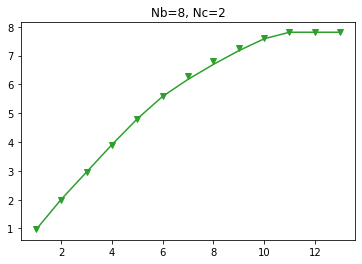

In [28]:
r = 2

Lc = 2
Lb = 8
Lalist=np.arange(1,Lb+Lc+4)

out_dir = 'LN_figs/' 

dims_ab = [r] * Lab

# def fa(xs):
#     ys= np.zeros(xs.shape)
#     for i_x in range(len(xs)):
#         x= xs[i_x]
#         if x>1:
#             ys[i_x]= np.real( np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 ) )
#         else:
#             ys[i_x]= 0
#     return ys

# at=2*r**((Lab-Lclist)/2)
# yt=fa(at)

plt.figure()
# plt.plot([0,Lalist.max()],[0,Lalist.max()],'k--')

logneg_q_avg = np.zeros(len(Lalist))
MI_avg = np.zeros(len(Lalist))

for i_c in range(len(Lalist)):
    La=Lalist[i_c]
    f1= 'LN_r_%d_NA_%d_NB_%d_NC_%d.npz' % (r,La,Lb,Lc)
    fname = out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        neg_q=npzfile['logneg']
        MI=npzfile['MI']
        print('Averaged over %d reps' % len(neg_q))

#     print(np.shape(neg_q))
    logneg_q_avg[i_c] = np.log2(2*np.mean(neg_q)+1)
    MI_avg[i_c] = np.mean(MI)

plt.plot(Lalist, logneg_q_avg, '-',color='C%d' % (i_c))
plt.plot(Lalist, MI_avg/2, 'v',color='C%d' % (i_c))
#     if Lc< Lab:
#         plt.plot([0,int(Lab)/2+1],(Lab-Lc)/2*np.array([1,1])+np.log2(8/(3*pi)),'--',color='C%d' % (i_c))

plt.title('Nb=%d, Nc=%d' % (Lb,Lc))
# plt.ylim(0,4.)
# plt.xlim(0,int(Lab)/2+1)
# plt.legend()
plt.show()